# LEARNING PANDAS

## Table of Contents <a class="anchor" id="toc"></a>
* [Pandas Series](#series)
 * [Series from lists](#serieslists)
 * [Series from dictionaries](#seriesdict)
 * [Series from arrays](#seriesarr)
 * [Modifying series](#seriesmod)
* [Pandas Dataframes](#df)
 * [Dataframes from lists & arrays](#dfscratch)
 * [Dataframes from dictionaries](#dfdict)
 * [Dataframes from series](#dfseries)
 * [Dataframes from dataframes](#dfdf)
* [Pandas Basics](#basics)
 * [View vs. Copy](#viewcopy)
 * [Data types](#datatypes)
 * [Modifying dataframes](#dfmod)
 * [Initial exploration](#describe)
 * [Introductory math](#math)
* [Example Datasets](#examples)
 * [COVID19](#covid)

In [1]:
import pandas as pd
import numpy as np

## Pandas Series <a class="anchor" id="series"></a>

### _Series from list_ <a class="anchor" id="serieslists"></a>

In [2]:
series1 = pd.Series(['1', 'a', np.nan, 'end'])
series1

0      1
1      a
2    NaN
3    end
dtype: object

In [3]:
series1.name = 'series 1'
series1

0      1
1      a
2    NaN
3    end
Name: series 1, dtype: object

In [4]:
series1.index = ['A','B','C','D']
series1

A      1
B      a
C    NaN
D    end
Name: series 1, dtype: object

In [78]:
series2 = pd.Series(['a', 1, 2, 45.0, 'almost', 'end'], name='series 2', index=list('ABCDEF'))
series2

A         a
B         1
C         2
D      45.0
E    almost
F       end
Name: series 2, dtype: object

In [6]:
series4 = pd.Series(np.random.randn(10), name='series 4')
series4

0    1.711719
1   -1.244181
2    0.193874
3    1.242953
4    0.803524
5    1.095610
6    0.574971
7    0.251353
8   -0.194158
9   -0.994983
Name: series 4, dtype: float64

[_Table of Contents_](#toc)

### _Series from dictionaries_ <a class="anchor" id="seriesdict"></a>

In [10]:
dict1 = {'COL 1': [1,2,3,4,5], 'COL 2': [10.0,10.5,11.0,11.5,12.0]}
dict1

{'COL 1': [1, 2, 3, 4, 5], 'COL 2': [10.0, 10.5, 11.0, 11.5, 12.0]}

In [11]:
series3 = pd.Series(dict1['COL 2'], name='series 3')
series3

0    10.0
1    10.5
2    11.0
3    11.5
4    12.0
Name: series 3, dtype: float64

In [12]:
id(series3)

140444881903888

In [13]:
id(dict1)

140444891233664

In [14]:
series3.values.base is dict1

False

In [17]:
series3.values.base == dict1

False

[_Table of Contents_](#toc)

### _Modifying series_ <a class="anchor" id="seriesmod"></a>

In [18]:
series1

A      1
B      a
C    NaN
D    end
Name: series 1, dtype: object

In [19]:
series1['E'] = "new value"
series1

A            1
B            a
C          NaN
D          end
E    new value
Name: series 1, dtype: object

In [20]:
series2

A         a
B         1
C         2
D      45.0
E    almost
F       end
Name: series 2, dtype: object

In [21]:
series2.pop('E')
series2

A       a
B       1
C       2
D    45.0
F     end
Name: series 2, dtype: object

In [22]:
series3

0    10.0
1    10.5
2    11.0
3    11.5
4    12.0
Name: series 3, dtype: float64

In [23]:
series3.name = 'hello'
series3.name

'hello'

In [24]:
series3.rename('goodbye')

0    10.0
1    10.5
2    11.0
3    11.5
4    12.0
Name: goodbye, dtype: float64

In [25]:
series3.name == 'goodbye'

False

In [26]:
series3.name

'hello'

In [27]:
series3.name == 'hello'

True

In [28]:
series3.rename('series 3', inplace=True)

0    10.0
1    10.5
2    11.0
3    11.5
4    12.0
Name: series 3, dtype: float64

In [29]:
series3.name == 'series 3'

True

[_Table of Contents_](#toc)

## Pandas Dataframes <a class="anchor" id="df"></a>

### _Dataframes from lists & arrays_ <a class="anchor" id="dfscratch"></a>

In [30]:
ls1 = [[1,2,3,4,5],list("ABCDE"),[20.0,45.0,np.nan,17,23.67]]
ls1

[[1, 2, 3, 4, 5], ['A', 'B', 'C', 'D', 'E'], [20.0, 45.0, nan, 17, 23.67]]

In [135]:
df1 = pd.DataFrame(ls1)
df1

,0,1,2,3,4
0,1,2,3,4,5
1,A,B,C,D,E
2,20.0,45.0,NaN,17,23.67


In [32]:
id(ls1)

140444891323712

In [33]:
id(df1)

140444878272880

In [34]:
df1.values.base is ls1

False

In [35]:
df1.values.base == ls1

/var/folders/cs/jyh0ydnd0r978qyg_lxk0t0h0000gn/T/ipykernel_99147/2669122987.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  df1.values.base == ls1


False

In [136]:
df1.columns = ['col 1', 'col 2', 'col 3', 'col 4', 'col 5']
df1

,col 1,col 2,col 3,col 4,col 5
0,1,2,3,4,5
1,A,B,C,D,E
2,20.0,45.0,NaN,17,23.67


In [137]:
df1.index = ['row 1', 'row 2', 'row 3']
df1

,col 1,col 2,col 3,col 4,col 5
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67


In [52]:
df2 = pd.DataFrame(ls1, columns=list("ABCDE"), index=['row 1', 'row 2', 'row 3'])
df2

,A,B,C,D,E
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67


In [39]:
arr1 = np.random.randint(0, 100, size=(6,4))
arr1

array([[54, 28, 16, 75],
       [68, 32, 23, 63],
       [26, 31, 95, 67],
       [69, 18, 33,  1],
       [75, 27, 79, 88],
       [62, 51, 37, 78]])

In [40]:
df3 = pd.DataFrame(arr1, columns=list('ABCD'))
df3

,A,B,C,D
0,54,28,16,75
1,68,32,23,63
2,26,31,95,67
3,69,18,33,1
4,75,27,79,88
5,62,51,37,78


In [41]:
df3.set_index('A')

,B,C,D
A,,,
54,28,16,75
68,32,23,63
26,31,95,67
69,18,33,1
75,27,79,88
62,51,37,78


In [43]:
df3.index is df3['A']

False

In [45]:
df3.index.values

array([0, 1, 2, 3, 4, 5])

In [46]:
df3.set_index('A', inplace=True)
df3

,B,C,D
A,,,
54,28,16,75
68,32,23,63
26,31,95,67
69,18,33,1
75,27,79,88
62,51,37,78


In [49]:
df3.reset_index(inplace=True)
df3

,A,B,C,D
0,54,28,16,75
1,68,32,23,63
2,26,31,95,67
3,69,18,33,1
4,75,27,79,88
5,62,51,37,78


In [50]:
dates = pd.date_range('20220721', periods=6)
dates

DatetimeIndex(['2022-07-21', '2022-07-22', '2022-07-23', '2022-07-24',
               '2022-07-25', '2022-07-26'],
              dtype='datetime64[ns]', freq='D')

In [53]:
df3['Date'] = dates
df3

,A,B,C,D,Date
0,54,28,16,75,2022-07-21
1,68,32,23,63,2022-07-22
2,26,31,95,67,2022-07-23
3,69,18,33,1,2022-07-24
4,75,27,79,88,2022-07-25
5,62,51,37,78,2022-07-26


In [54]:
df3.index = df3['Date']
df3

,A,B,C,D,Date
Date,,,,,
2022-07-21,54,28,16,75,2022-07-21
2022-07-22,68,32,23,63,2022-07-22
2022-07-23,26,31,95,67,2022-07-23
2022-07-24,69,18,33,1,2022-07-24
2022-07-25,75,27,79,88,2022-07-25
2022-07-26,62,51,37,78,2022-07-26


In [55]:
df3.reset_index(inplace=True, drop=True)
df3

,A,B,C,D,Date
0,54,28,16,75,2022-07-21
1,68,32,23,63,2022-07-22
2,26,31,95,67,2022-07-23
3,69,18,33,1,2022-07-24
4,75,27,79,88,2022-07-25
5,62,51,37,78,2022-07-26


[_Table of Contents_](#toc)

### *Dataframes from dictionaries* <a class="anchor" id="dfdict"></a>

In [56]:
dict1

{'COL 1': [1, 2, 3, 4, 5], 'COL 2': [10.0, 10.5, 11.0, 11.5, 12.0]}

In [57]:
df4 = pd.DataFrame(dict1)
df4

,COL 1,COL 2
0,1,10.0
1,2,10.5
2,3,11.0
3,4,11.5
4,5,12.0


In [59]:
df4.values.base is dict1

False

[_Table of Contents_](#toc)

### _Dataframes from series_ <a class="anchor" id="dfseries"></a>

In [60]:
series1

A            1
B            a
C          NaN
D          end
E    new value
Name: series 1, dtype: object

In [63]:
df5 = series1.to_frame()
df5

,series 1
A,1
B,a
C,NaN
D,end
E,new value


In [64]:
id(series1)

140444878265344

In [65]:
id(df5)

140444931159088

In [73]:
df5.values.base is series1.values.base

False

In [68]:
df5.values == series1.values

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False, False, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True]])

In [69]:
np.nan == np.nan

False

In [75]:
df5.columns = ['SERIES 1']
df5

,SERIES 1
A,1
B,a
C,NaN
D,end
E,new value


In [79]:
series2

A         a
B         1
C         2
D      45.0
E    almost
F       end
Name: series 2, dtype: object

In [83]:
df6 = series2.to_frame(name='SERIES 2')
df6

,SERIES 2
A,a
B,1
C,2
D,45.0
E,almost
F,end


In [84]:
df7 = pd.concat([series1, series2])
df7

A            1
B            a
C          NaN
D          end
E    new value
A            a
B            1
C            2
D         45.0
E       almost
F          end
dtype: object

In [85]:
df8 = pd.concat([series1, series2], axis=1)
df8

,series 1,series 2
A,1,a
B,a,1
C,NaN,2
D,end,45.0
E,new value,almost
F,NaN,end


In [86]:
type(df7)

pandas.core.series.Series

In [87]:
type(df8)

pandas.core.frame.DataFrame

In [96]:
id(df8['series 1']) is id(series1)

False

In [100]:
df8['series 2'].values.base is series2.values.base

False

In [88]:
series3

0    10.0
1    10.5
2    11.0
3    11.5
4    12.0
Name: series 3, dtype: float64

In [89]:
df9 = pd.concat([series1, series2, series3], axis=1)
df9

,series 1,series 2,series 3
A,1,a,NaN
B,a,1,NaN
C,NaN,2,NaN
D,end,45.0,NaN
E,new value,almost,NaN
F,NaN,end,NaN
0,NaN,NaN,10.0
1,NaN,NaN,10.5
2,NaN,NaN,11.0
3,NaN,NaN,11.5


In [91]:
df10 = pd.concat([series1.reset_index(drop=True), series2.reset_index(drop=True), series3.reset_index(drop=True)], axis=1)
df10

,series 1,series 2,series 3
0,1,a,10.0
1,a,1,10.5
2,NaN,2,11.0
3,end,45.0,11.5
4,new value,almost,12.0
5,NaN,end,NaN


[_Table of Contents_](#toc)

### _Dataframes from dataframes_ <a class="anchor" id="dfdf"></a> 

In [92]:
df5

,SERIES 1
A,1
B,a
C,NaN
D,end
E,new value


In [93]:
df6

,SERIES 2
A,a
B,1
C,2
D,45.0
E,almost
F,end


In [94]:
df8

,series 1,series 2
A,1,a
B,a,1
C,NaN,2
D,end,45.0
E,new value,almost
F,NaN,end


In [95]:
df11 = pd.concat([df5,df6,df8])
df11

,SERIES 1,SERIES 2,series 1,series 2
A,1,NaN,NaN,NaN
B,a,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN
D,end,NaN,NaN,NaN
E,new value,NaN,NaN,NaN
A,NaN,a,NaN,NaN
B,NaN,1,NaN,NaN
C,NaN,2,NaN,NaN
D,NaN,45.0,NaN,NaN
E,NaN,almost,NaN,NaN


In [101]:
df11 = pd.concat([df5,df6,df8], axis=1)
df11

,SERIES 1,SERIES 2,series 1,series 2
A,1,a,1,a
B,a,1,a,1
C,NaN,2,NaN,2
D,end,45.0,end,45.0
E,new value,almost,new value,almost
F,NaN,end,NaN,end


In [102]:
df12 = df5.join(df6,rsuffix='_df5',lsuffix='_df6')
df12

,SERIES 1,SERIES 2
A,1,a
B,a,1
C,NaN,2
D,end,45.0
E,new value,almost


[_Table of Contents_](#toc)

# Pandas Basics <a class="anchor" id="basics"></a>

### _View vs. Copy_ <a class="anchor" id="viewcopy"></a>

[_Table of Contents_](#toc)

### _Data types_ <a class="anchor" id="datatypes"></a>

[_Table of Contents_](#toc)

### _Modifying dataframes_ <a class="anchor" id="dfmod"></a>

In [112]:
df1

,col 1,col 2,col 3,col 4,col 5
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67


In [138]:
df1.loc['new row'] = 'a'
df1

,col 1,col 2,col 3,col 4,col 5
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67
new row,a,a,a,a,a


In [139]:
df1.loc['new row']['col 2'] = 'b'
df1

,col 1,col 2,col 3,col 4,col 5
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67
new row,a,b,a,a,a


In [140]:
df1.loc['new row'][2] = 'c'
df1

,col 1,col 2,col 3,col 4,col 5
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67
new row,a,b,c,a,a


In [141]:
df1.loc['new row'][3:] = list('de')
df1

,col 1,col 2,col 3,col 4,col 5
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67
new row,a,b,c,d,e


In [120]:
df1.iloc[1,1]

'B'

In [121]:
df1.iloc[1]

col 1    A
col 2    B
col 3    C
col 4    D
col 5    E
Name: row 2, dtype: object

In [122]:
df1.iloc[:,1]

row 1         2
row 2         B
row 3      45.0
new row       b
Name: col 2, dtype: object

In [142]:
df1['new column'] = 99
df1

,col 1,col 2,col 3,col 4,col 5,new column
row 1,1,2,3,4,5,99
row 2,A,B,C,D,E,99
row 3,20.0,45.0,NaN,17,23.67,99
new row,a,b,c,d,e,99


In [143]:
df1.drop('row 1')

,col 1,col 2,col 3,col 4,col 5,new column
row 2,A,B,C,D,E,99
row 3,20.0,45.0,NaN,17,23.67,99
new row,a,b,c,d,e,99


In [144]:
df1

,col 1,col 2,col 3,col 4,col 5,new column
row 1,1,2,3,4,5,99
row 2,A,B,C,D,E,99
row 3,20.0,45.0,NaN,17,23.67,99
new row,a,b,c,d,e,99


In [145]:
df1.drop('new column', axis=1, inplace=True)

In [146]:
df1

,col 1,col 2,col 3,col 4,col 5
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67
new row,a,b,c,d,e


In [ ]:
df1.pop('col 3')

In [ ]:
df1['new column']

In [147]:
dfpop = df1.pop('col 5')
dfpop

row 1          5
row 2          E
row 3      23.67
new row        e
Name: col 5, dtype: object

In [152]:
df1

,col 1,col 2,col 3,col 4
row 1,1,2,3,4
row 2,A,B,C,D
row 3,20.0,45.0,NaN,17
new row,a,b,c,d


In [153]:
df1.insert(4,'col 5',dfpop)
df1

,col 1,col 2,col 3,col 4,col 5
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67
new row,a,b,c,d,e


[_Table of Contents_](#toc)

### _Data exploration_ <a class="anchor" id="describe"></a>

In [160]:
df2

,A,B,C,D,E
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67


In [155]:
df2.shape

(3, 5)

In [156]:
df2.size

15

In [162]:
df13 = pd.concat([df2,df2,df2])
df13

,A,B,C,D,E
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67


In [163]:
df13.shape

(9, 5)

In [164]:
df13.size

45

In [165]:
df13.head()

,A,B,C,D,E
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67
row 1,1,2,3,4,5
row 2,A,B,C,D,E


In [187]:
df13.head(2)

,A,B,C,D,E
row 1,1,2,3,4,5
row 2,A,B,C,D,E


In [166]:
df13.tail()

,A,B,C,D,E
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67
row 1,1,2,3,4,5
row 2,A,B,C,D,E
row 3,20.0,45.0,NaN,17,23.67


In [167]:
df13.count()

A    9
B    9
C    6
D    9
E    9
dtype: int64

[_Table of Contents_](#toc)

### _Math_ <a class="anchor" id="math"></a>

In [171]:
df14 = pd.DataFrame(np.arange(15).reshape(3,5))
df14

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [172]:
df14.describe()

,0,1,2,3,4
count,3.0,3.0,3.0,3.0,3.0
mean,5.0,6.0,7.0,8.0,9.0
std,5.0,5.0,5.0,5.0,5.0
min,0.0,1.0,2.0,3.0,4.0
25%,2.5,3.5,4.5,5.5,6.5
50%,5.0,6.0,7.0,8.0,9.0
75%,7.5,8.5,9.5,10.5,11.5
max,10.0,11.0,12.0,13.0,14.0


In [174]:
df14.median()

0    5.0
1    6.0
2    7.0
3    8.0
4    9.0
dtype: float64

In [175]:
df14.median(axis=1)

0     2.0
1     7.0
2    12.0
dtype: float64

In [176]:
df14.mean()

0    5.0
1    6.0
2    7.0
3    8.0
4    9.0
dtype: float64

In [177]:
df14.mean(axis=1)

0     2.0
1     7.0
2    12.0
dtype: float64

In [178]:
df14.cumsum()

,0,1,2,3,4
0,0,1,2,3,4
1,5,7,9,11,13
2,15,18,21,24,27


In [179]:
df14.cumsum(axis=1)

,0,1,2,3,4
0,0,1,3,6,10
1,5,11,18,26,35
2,10,21,33,46,60


In [183]:
df14.std()

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
dtype: float64

In [184]:
df14.std(axis=1)

0    1.581139
1    1.581139
2    1.581139
dtype: float64

In [185]:
df14.sem()

0    2.886751
1    2.886751
2    2.886751
3    2.886751
4    2.886751
dtype: float64

In [186]:
df14.sem(axis=1)

0    0.707107
1    0.707107
2    0.707107
dtype: float64

In [180]:
df14 * 2

,0,1,2,3,4
0,0,2,4,6,8
1,10,12,14,16,18
2,20,22,24,26,28


In [181]:
np.exp(df14)

,0,1,2,3,4
0,1.000000,2.718282,7.389056,20.085537,5.459815e+01
1,148.413159,403.428793,1096.633158,2980.957987,8.103084e+03
2,22026.465795,59874.141715,162754.791419,442413.392009,1.202604e+06


In [182]:
-df14

,0,1,2,3,4
0,0,-1,-2,-3,-4
1,-5,-6,-7,-8,-9
2,-10,-11,-12,-13,-14


[_Table of Contents_](#toc)

### _Location & Indexing_

### _Multi-Indexing_

### _Reshaping_

### _Plotting_

# Example Datasets <a class="anchor" id="examples"></a>

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### _COVID - US Counties_ <a class="anchor" id="covid"></a>

Kaggle dataset - https://www.kaggle.com/datasets/fireballbyedimyrnmom/us-counties-covid-19-dataset

In [304]:
path = r'/Users/Matthew/Desktop/us-counties.csv'
covid = pd.read_csv(path)
covid

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
2502827,2022-05-13,Sweetwater,Wyoming,56037.0,11088,126.0
2502828,2022-05-13,Teton,Wyoming,56039.0,10074,16.0
2502829,2022-05-13,Uinta,Wyoming,56041.0,5643,39.0
2502830,2022-05-13,Washakie,Wyoming,56043.0,2358,44.0


In [301]:
covid.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [302]:
covid.tail()

,date,county,state,fips,cases,deaths
2502827,2022-05-13,Sweetwater,Wyoming,56037.0,11088,126.0
2502828,2022-05-13,Teton,Wyoming,56039.0,10074,16.0
2502829,2022-05-13,Uinta,Wyoming,56041.0,5643,39.0
2502830,2022-05-13,Washakie,Wyoming,56043.0,2358,44.0
2502831,2022-05-13,Weston,Wyoming,56045.0,1588,18.0


In [303]:
covid.shape

(2502832, 6)

In [305]:
covid.size

15016992

In [306]:
covid.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [307]:
covid.index

RangeIndex(start=0, stop=2502832, step=1)

In [308]:
covid.describe()

,fips,cases,deaths
count,2.479154e+06,2.502832e+06,2.445227e+06
mean,3.139958e+04,1.003380e+04,1.616100e+02
std,1.634251e+04,4.752522e+04,8.203335e+02
min,1.001000e+03,0.000000e+00,0.000000e+00
25%,1.902300e+04,3.820000e+02,6.000000e+00
50%,3.001100e+04,1.773000e+03,3.300000e+01
75%,4.611100e+04,5.884000e+03,1.010000e+02
max,7.803000e+04,2.908425e+06,4.026700e+04


In [309]:
covid.count()

date      2502832
county    2502832
state     2502832
fips      2479154
cases     2502832
deaths    2445227
dtype: int64

In [310]:
covid.pop('fips')

0          53061.0
1          53061.0
2          53061.0
3          17031.0
4          53061.0
            ...   
2502827    56037.0
2502828    56039.0
2502829    56041.0
2502830    56043.0
2502831    56045.0
Name: fips, Length: 2502832, dtype: float64

In [311]:
covid.head()

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0


In [312]:
covid.sort_values(by=['state', 'county'], inplace=True, ignore_index=True)
covid

,date,county,state,cases,deaths
0,2020-03-24,Autauga,Alabama,1,0.0
1,2020-03-25,Autauga,Alabama,4,0.0
2,2020-03-26,Autauga,Alabama,6,0.0
3,2020-03-27,Autauga,Alabama,6,0.0
4,2020-03-28,Autauga,Alabama,6,0.0
...,...,...,...,...,...
2502827,2022-05-09,Weston,Wyoming,1589,18.0
2502828,2022-05-10,Weston,Wyoming,1588,18.0
2502829,2022-05-11,Weston,Wyoming,1588,18.0
2502830,2022-05-12,Weston,Wyoming,1588,18.0


In [313]:
lex = covid.query('state == "Kentucky"').query('county == "Fayette"').sort_values(by='date')
lex

,date,county,state,cases,deaths
799738,2020-03-06,Fayette,Kentucky,1,0.0
799739,2020-03-07,Fayette,Kentucky,1,0.0
799740,2020-03-08,Fayette,Kentucky,2,0.0
799741,2020-03-09,Fayette,Kentucky,3,0.0
799742,2020-03-10,Fayette,Kentucky,3,0.0
...,...,...,...,...,...
800532,2022-05-09,Fayette,Kentucky,95993,609.0
800533,2022-05-10,Fayette,Kentucky,95993,609.0
800534,2022-05-11,Fayette,Kentucky,95993,609.0
800535,2022-05-12,Fayette,Kentucky,95993,609.0


In [314]:
jas = covid.query('state == "Alabama"').query('county == "Walker"').sort_values(by='date')
jas

,date,county,state,cases,deaths
49183,2020-03-19,Walker,Alabama,1,0.0
49184,2020-03-20,Walker,Alabama,1,0.0
49185,2020-03-21,Walker,Alabama,1,0.0
49186,2020-03-22,Walker,Alabama,1,0.0
49187,2020-03-23,Walker,Alabama,3,0.0
...,...,...,...,...,...
49964,2022-05-09,Walker,Alabama,18749,446.0
49965,2022-05-10,Walker,Alabama,18751,446.0
49966,2022-05-11,Walker,Alabama,18758,446.0
49967,2022-05-12,Walker,Alabama,18763,447.0


In [345]:
mulind = pd.MultiIndex.from_frame(covid[['state', 'county']])
df

MultiIndex([('Alabama', 'Autauga'),
            ('Alabama', 'Autauga'),
            ('Alabama', 'Autauga'),
            ('Alabama', 'Autauga'),
            ('Alabama', 'Autauga'),
            ('Alabama', 'Autauga'),
            ('Alabama', 'Autauga'),
            ('Alabama', 'Autauga'),
            ('Alabama', 'Autauga'),
            ('Alabama', 'Autauga'),
            ...
            ('Wyoming',  'Weston'),
            ('Wyoming',  'Weston'),
            ('Wyoming',  'Weston'),
            ('Wyoming',  'Weston'),
            ('Wyoming',  'Weston'),
            ('Wyoming',  'Weston'),
            ('Wyoming',  'Weston'),
            ('Wyoming',  'Weston'),
            ('Wyoming',  'Weston'),
            ('Wyoming',  'Weston')],
           names=['state', 'county'], length=2502832)

In [347]:
covid.set_index(mulind, inplace=True)
covid

date   county    state  cases  deaths
state   county                                              
Alabama Autauga  2020-03-24  Autauga  Alabama      1     0.0
        Autauga  2020-03-25  Autauga  Alabama      4     0.0
        Autauga  2020-03-26  Autauga  Alabama      6     0.0
        Autauga  2020-03-27  Autauga  Alabama      6     0.0
        Autauga  2020-03-28  Autauga  Alabama      6     0.0
...                     ...      ...      ...    ...     ...
Wyoming Weston   2022-05-09   Weston  Wyoming   1589    18.0
        Weston   2022-05-10   Weston  Wyoming   1588    18.0
        Weston   2022-05-11   Weston  Wyoming   1588    18.0
        Weston   2022-05-12   Weston  Wyoming   1588    18.0
        Weston   2022-05-13   Weston  Wyoming   1588    18.0

[2502832 rows x 5 columns]

In [356]:
states = ['Kentucky', 'Alabama']
counties = ['Fayette', 'Walker']
covid.query('state == @states').query('county == @counties')

date   county     state  cases  deaths
state    county                                               
Alabama  Fayette  2020-03-30  Fayette   Alabama      1     0.0
         Fayette  2020-03-31  Fayette   Alabama      1     0.0
         Fayette  2020-04-01  Fayette   Alabama      1     0.0
         Fayette  2020-04-02  Fayette   Alabama      1     0.0
         Fayette  2020-04-03  Fayette   Alabama      1     0.0
...                      ...      ...       ...    ...     ...
Kentucky Fayette  2022-05-09  Fayette  Kentucky  95993   609.0
         Fayette  2022-05-10  Fayette  Kentucky  95993   609.0
         Fayette  2022-05-11  Fayette  Kentucky  95993   609.0
         Fayette  2022-05-12  Fayette  Kentucky  95993   609.0
         Fayette  2022-05-13  Fayette  Kentucky  95993   609.0

[2360 rows x 5 columns]

In [360]:
covid.query('state == "Kentucky" and county == "Fayette"')

date   county     state  cases  deaths
state    county                                               
Kentucky Fayette  2020-03-06  Fayette  Kentucky      1     0.0
         Fayette  2020-03-07  Fayette  Kentucky      1     0.0
         Fayette  2020-03-08  Fayette  Kentucky      2     0.0
         Fayette  2020-03-09  Fayette  Kentucky      3     0.0
         Fayette  2020-03-10  Fayette  Kentucky      3     0.0
...                      ...      ...       ...    ...     ...
         Fayette  2022-05-09  Fayette  Kentucky  95993   609.0
         Fayette  2022-05-10  Fayette  Kentucky  95993   609.0
         Fayette  2022-05-11  Fayette  Kentucky  95993   609.0
         Fayette  2022-05-12  Fayette  Kentucky  95993   609.0
         Fayette  2022-05-13  Fayette  Kentucky  95993   609.0

[799 rows x 5 columns]

In [376]:
df = pd.concat(objs=[covid.loc[('Kentucky','Fayette')], covid.loc[('Alabama','Walker')]]).reset_index(drop=True)
df

,date,county,state,cases,deaths
0,2020-03-06,Fayette,Kentucky,1,0.0
1,2020-03-07,Fayette,Kentucky,1,0.0
2,2020-03-08,Fayette,Kentucky,2,0.0
3,2020-03-09,Fayette,Kentucky,3,0.0
4,2020-03-10,Fayette,Kentucky,3,0.0
...,...,...,...,...,...
1580,2022-05-09,Walker,Alabama,18749,446.0
1581,2022-05-10,Walker,Alabama,18751,446.0
1582,2022-05-11,Walker,Alabama,18758,446.0
1583,2022-05-12,Walker,Alabama,18763,447.0


In [391]:
sns.set_theme()

<AxesSubplot:xlabel='date', ylabel='cases'>

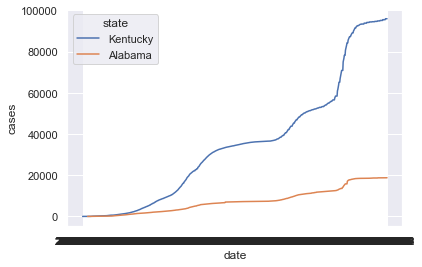

In [393]:
cases = sns.lineplot(x='date', y='cases', data=df, hue='state', ci=None)
cases

In [394]:
df['date'].min()

'2020-03-06'

In [395]:
df['date'].max()

'2022-05-13'

In [401]:
df.head()

,date,county,state,cases,deaths
0,2020-03-06,Fayette,Kentucky,1,0.0
1,2020-03-07,Fayette,Kentucky,1,0.0
2,2020-03-08,Fayette,Kentucky,2,0.0
3,2020-03-09,Fayette,Kentucky,3,0.0
4,2020-03-10,Fayette,Kentucky,3,0.0


In [403]:
df['case_rate'] = df['cases'].diff()
df

,date,county,state,cases,deaths,case_rate
0,2020-03-06,Fayette,Kentucky,1,0.0,NaN
1,2020-03-07,Fayette,Kentucky,1,0.0,0.0
2,2020-03-08,Fayette,Kentucky,2,0.0,1.0
3,2020-03-09,Fayette,Kentucky,3,0.0,1.0
4,2020-03-10,Fayette,Kentucky,3,0.0,0.0
...,...,...,...,...,...,...
1580,2022-05-09,Walker,Alabama,18749,446.0,1.0
1581,2022-05-10,Walker,Alabama,18751,446.0,2.0
1582,2022-05-11,Walker,Alabama,18758,446.0,7.0
1583,2022-05-12,Walker,Alabama,18763,447.0,5.0


In [406]:
df['case_rate_5day'] = df['cases'].diff(periods=5)
df.tail(6)

,date,county,state,cases,deaths,case_rate,case_rate_5day
1579,2022-05-08,Walker,Alabama,18748,446.0,0.0,7.0
1580,2022-05-09,Walker,Alabama,18749,446.0,1.0,6.0
1581,2022-05-10,Walker,Alabama,18751,446.0,2.0,6.0
1582,2022-05-11,Walker,Alabama,18758,446.0,7.0,10.0
1583,2022-05-12,Walker,Alabama,18763,447.0,5.0,15.0
1584,2022-05-13,Walker,Alabama,18767,447.0,4.0,19.0


In [413]:
df.query('state == "Alabama"').sort_values(by='date',ascending=True)

,date,county,state,cases,deaths,case_rate,case_rate_5day
799,2020-03-19,Walker,Alabama,1,0.0,-95992.0,-95992.0
800,2020-03-20,Walker,Alabama,1,0.0,0.0,-95992.0
801,2020-03-21,Walker,Alabama,1,0.0,0.0,-95992.0
802,2020-03-22,Walker,Alabama,1,0.0,0.0,-95992.0
803,2020-03-23,Walker,Alabama,3,0.0,2.0,-95990.0
...,...,...,...,...,...,...,...
1580,2022-05-09,Walker,Alabama,18749,446.0,1.0,6.0
1581,2022-05-10,Walker,Alabama,18751,446.0,2.0,6.0
1582,2022-05-11,Walker,Alabama,18758,446.0,7.0,10.0
1583,2022-05-12,Walker,Alabama,18763,447.0,5.0,15.0


In [415]:
df.iloc[799,5] = np.nan

In [417]:
df['case_rate_5day'][799:804] = np.nan

/var/folders/cs/jyh0ydnd0r978qyg_lxk0t0h0000gn/T/ipykernel_99147/1153279943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['case_rate_5day'][799:804] = np.nan


In [418]:
df.query('state == "Alabama"').sort_values(by='date',ascending=True)

,date,county,state,cases,deaths,case_rate,case_rate_5day
799,2020-03-19,Walker,Alabama,1,0.0,NaN,NaN
800,2020-03-20,Walker,Alabama,1,0.0,0.0,NaN
801,2020-03-21,Walker,Alabama,1,0.0,0.0,NaN
802,2020-03-22,Walker,Alabama,1,0.0,0.0,NaN
803,2020-03-23,Walker,Alabama,3,0.0,2.0,NaN
...,...,...,...,...,...,...,...
1580,2022-05-09,Walker,Alabama,18749,446.0,1.0,6.0
1581,2022-05-10,Walker,Alabama,18751,446.0,2.0,6.0
1582,2022-05-11,Walker,Alabama,18758,446.0,7.0,10.0
1583,2022-05-12,Walker,Alabama,18763,447.0,5.0,15.0


<AxesSubplot:xlabel='date', ylabel='case_rate'>

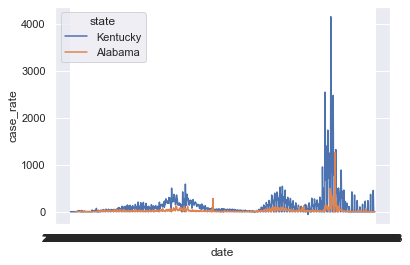

In [419]:
sns.lineplot(x='date', y='case_rate', data=df, hue='state', ci=None)

In [421]:
df.query('state == "Alabama"').max()

date              2022-05-13
county                Walker
state                Alabama
cases                  18767
deaths                 447.0
case_rate             1270.0
case_rate_5day        1872.0
dtype: object

In [422]:
df.query('state == "Kentucky"').max()

date              2022-05-13
county               Fayette
state               Kentucky
cases                  95993
deaths                 609.0
case_rate             4157.0
case_rate_5day        7338.0
dtype: object

<AxesSubplot:xlabel='date', ylabel='case_rate_5day'>

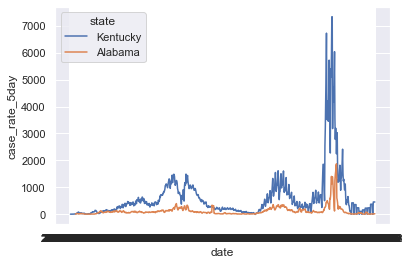

In [420]:
sns.lineplot(x='date', y='case_rate_5day', data=df, hue='state', ci=None)

In [423]:
df['death_rate'] = df['deaths'].diff()

In [424]:
df['death_rate_5day'] = df['deaths'].diff(5)

In [425]:
df.query('state == "Alabama"').max()

date               2022-05-13
county                 Walker
state                 Alabama
cases                   18767
deaths                  447.0
case_rate              1270.0
case_rate_5day         1872.0
death_rate               31.0
death_rate_5day          32.0
dtype: object

In [426]:
df.query('state == "Kentucky"').max()

date               2022-05-13
county                Fayette
state                Kentucky
cases                   95993
deaths                  609.0
case_rate              4157.0
case_rate_5day         7338.0
death_rate               12.0
death_rate_5day          28.0
dtype: object

<AxesSubplot:xlabel='date', ylabel='death_rate'>

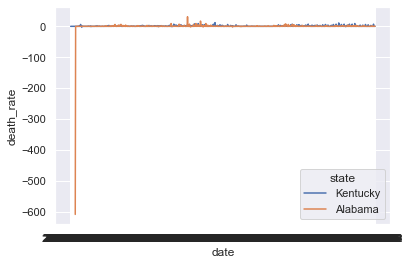

In [427]:
sns.lineplot(x='date', y='death_rate', data=df, hue='state', ci=None)

In [436]:
df.query('death_rate < 0')

,date,county,state,cases,deaths,case_rate,case_rate_5day,death_rate,death_rate_5day
30,2020-04-05,Fayette,Kentucky,153,6.0,28.0,47.0,-3.0,4.0
54,2020-04-29,Fayette,Kentucky,246,9.0,4.0,20.0,-1.0,1.0
230,2020-10-22,Fayette,Kentucky,10194,90.0,118.0,376.0,-1.0,3.0
266,2020-11-27,Fayette,Kentucky,16703,112.0,502.0,1163.0,-1.0,0.0
425,2021-05-05,Fayette,Kentucky,35506,308.0,55.0,191.0,-1.0,1.0
721,2022-02-25,Fayette,Kentucky,92659,547.0,217.0,1124.0,-1.0,7.0
799,2020-03-19,Walker,Alabama,1,0.0,NaN,NaN,-609.0,-609.0
1018,2020-10-24,Walker,Alabama,2772,92.0,17.0,92.0,-1.0,0.0
1100,2021-01-14,Walker,Alabama,5834,176.0,31.0,120.0,-1.0,6.0
1101,2021-01-15,Walker,Alabama,5852,174.0,18.0,118.0,-2.0,4.0


In [442]:
df.drop(index=799, inplace=True)

<AxesSubplot:xlabel='date', ylabel='death_rate'>

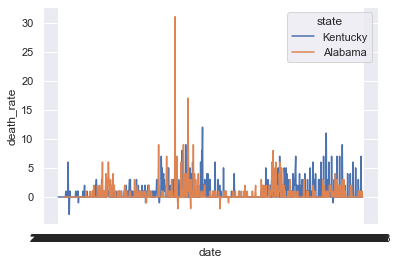

In [443]:
sns.lineplot(x='date', y='death_rate', data=df, hue='state', ci=None)

<AxesSubplot:xlabel='date', ylabel='death_rate_5day'>

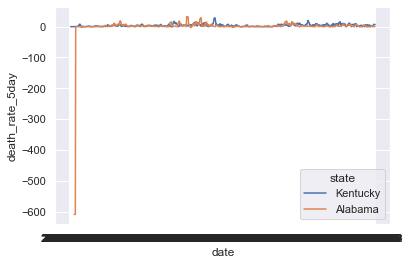

In [444]:
sns.lineplot(x='date', y='death_rate_5day', data=df, hue='state', ci=None)

In [445]:
df.query('death_rate_5day < 0')

,date,county,state,cases,deaths,case_rate,case_rate_5day,death_rate,death_rate_5day
32,2020-04-07,Fayette,Kentucky,170,7.0,17.0,46.0,1.0,-1.0
33,2020-04-08,Fayette,Kentucky,170,7.0,0.0,46.0,0.0,-1.0
34,2020-04-09,Fayette,Kentucky,174,7.0,4.0,49.0,0.0,-2.0
58,2020-05-03,Fayette,Kentucky,292,9.0,38.0,50.0,0.0,-1.0
269,2020-11-30,Fayette,Kentucky,17413,112.0,209.0,1212.0,0.0,-1.0
800,2020-03-20,Walker,Alabama,1,0.0,0.0,NaN,0.0,-609.0
801,2020-03-21,Walker,Alabama,1,0.0,0.0,NaN,0.0,-609.0
802,2020-03-22,Walker,Alabama,1,0.0,0.0,NaN,0.0,-609.0
803,2020-03-23,Walker,Alabama,3,0.0,2.0,NaN,0.0,-609.0
1020,2020-10-26,Walker,Alabama,2823,92.0,29.0,124.0,0.0,-1.0


In [453]:
df.iloc[800:803,8] = np.nan

,date,county,state,cases,deaths,case_rate,case_rate_5day,death_rate,death_rate_5day
800,2020-03-20,Walker,Alabama,1,0.0,0.0,NaN,0.0,-609.0
801,2020-03-21,Walker,Alabama,1,0.0,0.0,NaN,0.0,NaN
802,2020-03-22,Walker,Alabama,1,0.0,0.0,NaN,0.0,NaN
803,2020-03-23,Walker,Alabama,3,0.0,2.0,NaN,0.0,NaN


In [458]:
df.iloc[799,8] = np.nan

In [460]:
df.reset_index(inplace=True, drop=True)
df

,date,county,state,cases,deaths,case_rate,case_rate_5day,death_rate,death_rate_5day
0,2020-03-06,Fayette,Kentucky,1,0.0,NaN,NaN,NaN,NaN
1,2020-03-07,Fayette,Kentucky,1,0.0,0.0,NaN,0.0,NaN
2,2020-03-08,Fayette,Kentucky,2,0.0,1.0,NaN,0.0,NaN
3,2020-03-09,Fayette,Kentucky,3,0.0,1.0,NaN,0.0,NaN
4,2020-03-10,Fayette,Kentucky,3,0.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...
1579,2022-05-09,Walker,Alabama,18749,446.0,1.0,6.0,0.0,1.0
1580,2022-05-10,Walker,Alabama,18751,446.0,2.0,6.0,0.0,1.0
1581,2022-05-11,Walker,Alabama,18758,446.0,7.0,10.0,0.0,0.0
1582,2022-05-12,Walker,Alabama,18763,447.0,5.0,15.0,1.0,1.0


In [461]:
df.query('death_rate_5day < 0')

,date,county,state,cases,deaths,case_rate,case_rate_5day,death_rate,death_rate_5day
32,2020-04-07,Fayette,Kentucky,170,7.0,17.0,46.0,1.0,-1.0
33,2020-04-08,Fayette,Kentucky,170,7.0,0.0,46.0,0.0,-1.0
34,2020-04-09,Fayette,Kentucky,174,7.0,4.0,49.0,0.0,-2.0
58,2020-05-03,Fayette,Kentucky,292,9.0,38.0,50.0,0.0,-1.0
269,2020-11-30,Fayette,Kentucky,17413,112.0,209.0,1212.0,0.0,-1.0
1019,2020-10-26,Walker,Alabama,2823,92.0,29.0,124.0,0.0,-1.0
1102,2021-01-17,Walker,Alabama,5897,174.0,17.0,122.0,0.0,-3.0
1103,2021-01-18,Walker,Alabama,5903,174.0,6.0,100.0,0.0,-3.0
1104,2021-01-19,Walker,Alabama,5930,174.0,27.0,96.0,0.0,-2.0
1210,2021-05-05,Walker,Alabama,7214,277.0,9.0,14.0,-2.0,-1.0


In [465]:
df.head(33)

,date,county,state,cases,deaths,case_rate,case_rate_5day,death_rate,death_rate_5day
0,2020-03-06,Fayette,Kentucky,1,0.0,NaN,NaN,NaN,NaN
1,2020-03-07,Fayette,Kentucky,1,0.0,0.0,NaN,0.0,NaN
2,2020-03-08,Fayette,Kentucky,2,0.0,1.0,NaN,0.0,NaN
3,2020-03-09,Fayette,Kentucky,3,0.0,1.0,NaN,0.0,NaN
4,2020-03-10,Fayette,Kentucky,3,0.0,0.0,NaN,0.0,NaN
5,2020-03-11,Fayette,Kentucky,3,0.0,0.0,2.0,0.0,0.0
6,2020-03-12,Fayette,Kentucky,4,0.0,1.0,3.0,0.0,0.0
7,2020-03-13,Fayette,Kentucky,4,0.0,0.0,2.0,0.0,0.0
8,2020-03-14,Fayette,Kentucky,5,0.0,1.0,2.0,0.0,0.0
9,2020-03-15,Fayette,Kentucky,5,0.0,0.0,2.0,0.0,0.0


<AxesSubplot:xlabel='date', ylabel='death_rate_5day'>

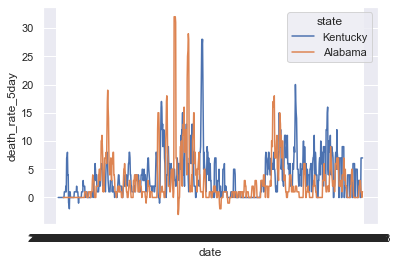

In [462]:
sns.lineplot(x='date', y='death_rate_5day', data=df, hue='state', ci=None)

In [ ]:
cdc['Country'].isin(['US'])

In [ ]:
cdc[cdc.Country.isin(['US'])]

In [ ]:
cdc.dtypes

In [ ]:
cdc.select_dtypes(include='int64')

In [ ]:
cdc.select_dtypes(exclude='object')

In [ ]:
cdc.select_dtypes(include='int64').mean()

In [ ]:
cdc.select_dtypes(include='int64').mean(1)

In [ ]:
cdc.groupby('Country').sum().sort_values('Confirmed', ascending=False)

In [ ]:
us = cdc[cdc['Country'] == 'US']
us

In [ ]:
us.pop(us.columns[0])

In [ ]:
us

In [ ]:
us.set_index('Date', inplace=True)
us

In [ ]:
sns.set_theme()
us.newConfirmed.plot()

[_Table of Contents_](#toc)